In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#https://www.w3schools.com/python/pandas/ref_df_describe.asp
#histograms & box plots @ https://www.geeksforgeeks.org/box-plot-and-histogram-exploration-on-iris-data/
#adding legend https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/
import seaborn as sns
#import sys
#from datetime import datetime
#import csv
import pandas as pd
import plotly.express as px

# Introduction

I will read in CO2 datsets from IPCC, Nature and Mauna loa. I will examine each dataset and plot the relebant variables to determine which dataset is most suitable for further analysis.

## Read in C02 file and examine dataset

In [2]:
co2_nature = pd.read_excel('imported_datasets/C02 Nature Paper.xlsx',sheet_name= '3.  Composite CO2',skiprows=range(6))
co2_nature

,EDC3_gas_a (yr),CO2 (ppmv)
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9
...,...,...
1091,794608,199.4
1092,795202,195.2
1093,796467,189.3
1094,797099,188.4


In [3]:
co2_nature.dtypes

EDC3_gas_a (yr)      int64
CO2 (ppmv)         float64
dtype: object

In [4]:
co2_nature.describe()

,EDC3_gas_a (yr),CO2 (ppmv)
count,1096.000000,1096.000000
mean,390905.979015,230.835675
std,262092.947239,27.573616
min,137.000000,171.600000
25%,137133.500000,207.500000
50%,423206.500000,231.450000
75%,627408.000000,251.525000
max,798512.000000,298.600000


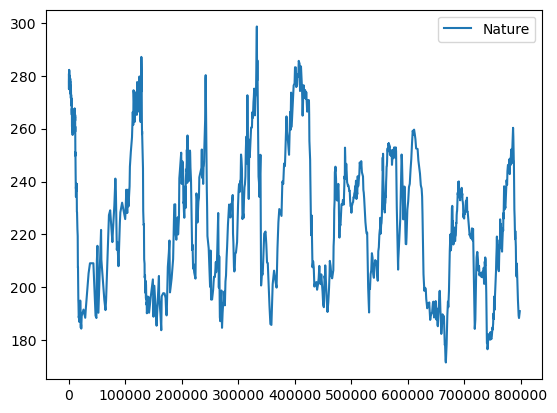

In [5]:
plt.plot(co2_nature['EDC3_gas_a (yr)'],co2_nature['CO2 (ppmv)'], label = 'Nature')
plt.legend()
plt.show()

In [6]:
# Read the Excel file into a pandas DataFrame and exclude inital 14 rows
co2_ipcc = pd.read_excel('imported_datasets/C02 IPCC Report.xlsx',sheet_name= 'CO2 Composite',skiprows=range(14))
co2_ipcc

,Gasage (yr BP),CO2 (ppmv),sigma mean CO2 (ppmv)
0,-51.030000,368.022488,0.060442
1,-48.000000,361.780737,0.370000
2,-46.279272,359.647793,0.098000
3,-44.405642,357.106740,0.159923
4,-43.080000,353.946685,0.043007
...,...,...,...
1896,803925.284376,202.921723,2.064488
1897,804009.870607,207.498645,0.915083
1898,804522.674630,204.861938,1.642851
1899,805132.442334,202.226839,0.689587


In [7]:
co2_ipcc.columns = co2_ipcc.columns.str.lstrip()
co2_ipcc.columns = co2_ipcc.columns.str.rstrip()

In [8]:
co2_nature.dtypes

EDC3_gas_a (yr)      int64
CO2 (ppmv)         float64
dtype: object

In [9]:
co2_nature.describe()

,EDC3_gas_a (yr),CO2 (ppmv)
count,1096.000000,1096.000000
mean,390905.979015,230.835675
std,262092.947239,27.573616
min,137.000000,171.600000
25%,137133.500000,207.500000
50%,423206.500000,231.450000
75%,627408.000000,251.525000
max,798512.000000,298.600000


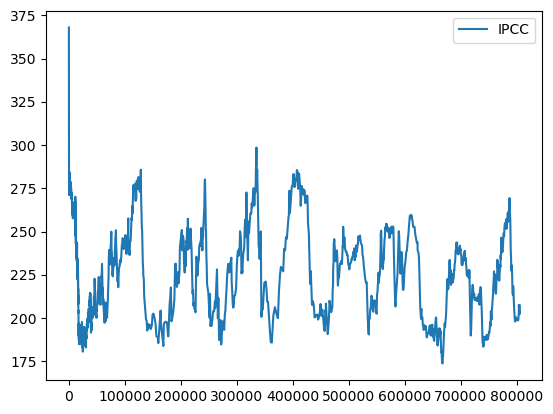

In [10]:
plt.plot(co2_ipcc['Gasage (yr BP)'],co2_ipcc['CO2 (ppmv)'],label = 'IPCC')
plt.legend()
plt.show()

Remove blank spaces at beginning and end of string https://stackoverflow.com/questions/41476150/remove-or-replace-spaces-in-column-names

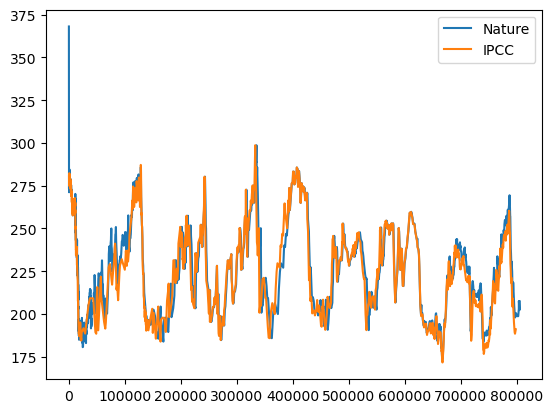

In [11]:
plt.plot(co2_ipcc['Gasage (yr BP)'],co2_ipcc['CO2 (ppmv)'], label = 'Nature')
plt.plot(co2_nature['EDC3_gas_a (yr)'],co2_nature['CO2 (ppmv)'], label = 'IPCC')
plt.legend()
plt.show()

### Mauna Loa CO2 dataset

In [12]:
co2_mauna_loa=pd.read_csv('imported_datasets/Mauna Loa CO2.csv',skiprows=range(43))
co2_mauna_loa

,year,mean,unc
0,1959,315.98,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12
...,...,...,...
59,2018,408.72,0.12
60,2019,411.65,0.12
61,2020,414.21,0.12
62,2021,416.41,0.12


In [13]:
co2_mauna_loa = co2_mauna_loa.rename(columns=(({'year':'EDC3_gas_a (yr)'})))
co2_mauna_loa = co2_mauna_loa.rename(columns=(({'mean':'CO2 (ppmv)'})))

In [14]:
co2_mauna_loa.dtypes

EDC3_gas_a (yr)      int64
CO2 (ppmv)         float64
unc                float64
dtype: object

In [15]:
co2_mauna_loa.describe()

,EDC3_gas_a (yr),CO2 (ppmv),unc
count,64.000000,64.000000,6.400000e+01
mean,1990.500000,358.293437,1.200000e-01
std,18.618987,30.580414,9.791247e-17
min,1959.000000,315.980000,1.200000e-01
25%,1974.750000,330.895000,1.200000e-01
50%,1990.500000,355.075000,1.200000e-01
75%,2006.250000,382.572500,1.200000e-01
max,2022.000000,418.530000,1.200000e-01


Converting Mauna Loa data to match format of Nature CO2 dataset

In [16]:
co2_mauna_loa.columns = co2_mauna_loa.columns.str.lstrip()
co2_mauna_loa.columns = co2_mauna_loa.columns.str.rstrip()

In [17]:
base = 1950
co2_mauna_loa['EDC3_gas_a (yr)'] = base - co2_mauna_loa['EDC3_gas_a (yr)']

In [18]:
co2_mauna_loa

,EDC3_gas_a (yr),CO2 (ppmv),unc
0,-9,315.98,0.12
1,-10,316.91,0.12
2,-11,317.64,0.12
3,-12,318.45,0.12
4,-13,318.99,0.12
...,...,...,...
59,-68,408.72,0.12
60,-69,411.65,0.12
61,-70,414.21,0.12
62,-71,416.41,0.12


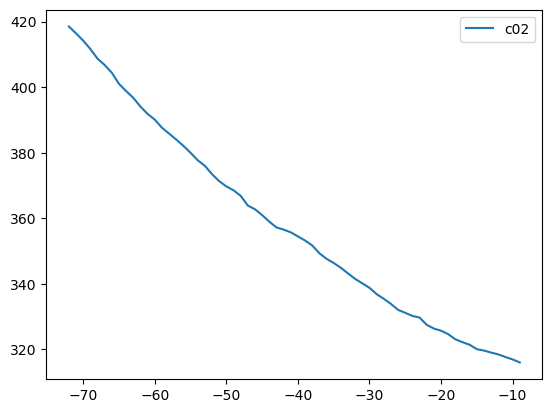

In [19]:
plt.plot(co2_mauna_loa['EDC3_gas_a (yr)'],co2_mauna_loa['CO2 (ppmv)'] ,label ='c02')
plt.legend()
plt.show()


In [20]:
co2_mauna_loa.columns = co2_mauna_loa.columns.str.lstrip()
co2_mauna_loa.columns = co2_mauna_loa.columns.str.rstrip()

In [21]:
co2_mauna_loa

,EDC3_gas_a (yr),CO2 (ppmv),unc
0,-9,315.98,0.12
1,-10,316.91,0.12
2,-11,317.64,0.12
3,-12,318.45,0.12
4,-13,318.99,0.12
...,...,...,...
59,-68,408.72,0.12
60,-69,411.65,0.12
61,-70,414.21,0.12
62,-71,416.41,0.12


comparing datasets before merging to ensure compatabillity

In [22]:
co2_nature.dtypes

EDC3_gas_a (yr)      int64
CO2 (ppmv)         float64
dtype: object

In [23]:
co2_mauna_loa.dtypes

EDC3_gas_a (yr)      int64
CO2 (ppmv)         float64
unc                float64
dtype: object

In [24]:
co2_nature_mauna_loa = pd.concat([co2_mauna_loa, co2_nature])
co2_nature_mauna_loa = co2_nature_mauna_loa.drop(['unc'],axis =1)

In [25]:
co2_nature_mauna_loa

,EDC3_gas_a (yr),CO2 (ppmv)
0,-9,315.98
1,-10,316.91
2,-11,317.64
3,-12,318.45
4,-13,318.99
...,...,...
1091,794608,199.40
1092,795202,195.20
1093,796467,189.30
1094,797099,188.40


In [26]:
co2_nature_mauna_loa

,EDC3_gas_a (yr),CO2 (ppmv)
0,-9,315.98
1,-10,316.91
2,-11,317.64
3,-12,318.45
4,-13,318.99
...,...,...
1091,794608,199.40
1092,795202,195.20
1093,796467,189.30
1094,797099,188.40


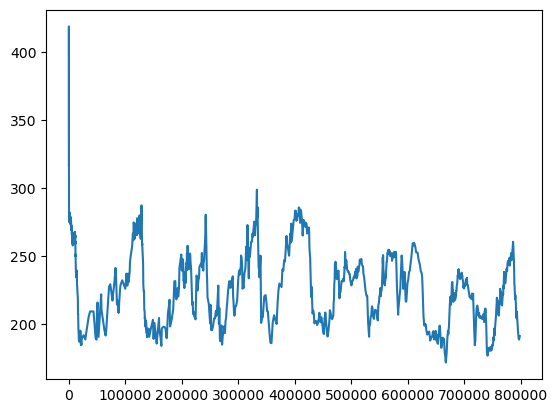

In [27]:
plt.plot(co2_nature_mauna_loa['EDC3_gas_a (yr)'],co2_nature_mauna_loa['CO2 (ppmv)'])
plt.show()

In [28]:
co2_nature_mauna_loa.dtypes

EDC3_gas_a (yr)      int64
CO2 (ppmv)         float64
dtype: object

In [29]:
co2_nature_mauna_loa.describe()

,EDC3_gas_a (yr),CO2 (ppmv)
count,1160.000000,1160.000000
mean,369336.518103,237.867828
std,269951.176372,40.208643
min,-72.000000,171.600000
25%,114474.750000,208.875000
50%,390921.000000,233.800000
75%,608013.250000,257.250000
max,798512.000000,418.530000


In [30]:
co2_nature_mauna_loa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1160 entries, 0 to 1095
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   EDC3_gas_a (yr)  1160 non-null   int64  
 1   CO2 (ppmv)       1160 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 27.2 KB


As mentioned above,  I have *read* in CO2 datsets from IPCC, Nature and Mauna loa. I have combined the Nature and Mauna Loa datasets to create a more compete dataset. This is the dataset i will use going forward for C02 

# Reading in Temperature data

I will read in Temperature datsets from Jouzel, Noaa. I will examine each dataset and plot the relebant variables to determine which dataset is most suitable for further analysis.

In [31]:
temp_jouzel=pd.read_csv('imported_datasets/Temp Data Jouzel.csv',encoding='Latin')
temp_jouzel

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453
...,...,...,...,...,...,...,...
5814,5815,3197.70,816871.60000,817562.000000,-432.2,211.0,1.529000
5815,5816,3198.25,817693.60000,818631.000000,-431.4,211.2,1.548000
5816,5817,3198.80,818505.50000,819700.000000,-430.3,211.3,1.576000
5817,5818,3199.35,819303.10000,820769.000000,-429.8,211.4,1.589000


adding new column called differnce in order to comapare NOAA dataset and Jouzel dataset. once plotted, calculation is temp value from Jouzel minus *218.32 which gives .88 anomaly value in NOAA dataset

In [32]:
temp_jouzel['difference'] = temp_jouzel['temp'] - 218.32
temp_jouzel

,bag,ztop,EDC3béta,AICC2012,deutfinal,temp,acc-EDC3beta,difference
0,1,0.00,-50.00000,-55.000000,NaN,218.3,3.105321,-0.02
1,2,0.55,-43.55977,-50.513333,NaN,218.3,3.104805,-0.02
2,3,1.10,-37.44019,-46.026667,NaN,218.3,3.104404,-0.02
3,4,1.65,-31.64156,-41.540000,NaN,218.3,3.104025,-0.02
4,5,2.20,-24.55278,-34.516667,NaN,218.3,3.103453,-0.02
...,...,...,...,...,...,...,...,...
5814,5815,3197.70,816871.60000,817562.000000,-432.2,211.0,1.529000,-7.32
5815,5816,3198.25,817693.60000,818631.000000,-431.4,211.2,1.548000,-7.12
5816,5817,3198.80,818505.50000,819700.000000,-430.3,211.3,1.576000,-7.02
5817,5818,3199.35,819303.10000,820769.000000,-429.8,211.4,1.589000,-6.92


In [33]:
temp_jouzel['celsius'] = temp_jouzel['temp'] - 273.15

In [34]:
temp_jouzel.to_csv('jouzy_temp.csv', encoding='utf-8', index=False)

In [35]:
temp_jouzel.dtypes

bag               int64
ztop            float64
EDC3béta        float64
AICC2012        float64
deutfinal       float64
temp            float64
acc-EDC3beta    float64
difference      float64
celsius         float64
dtype: object

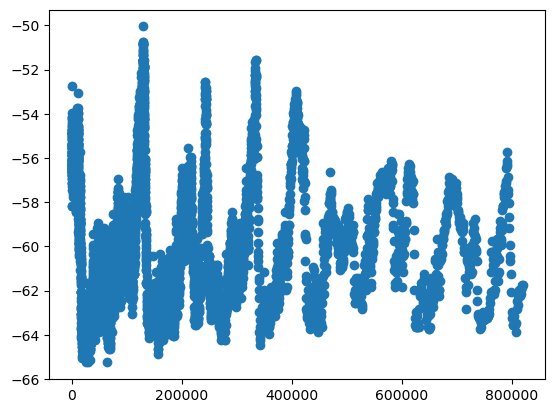

In [36]:
plt.scatter(temp_jouzel['EDC3béta'],temp_jouzel['celsius'], label='Observed data')

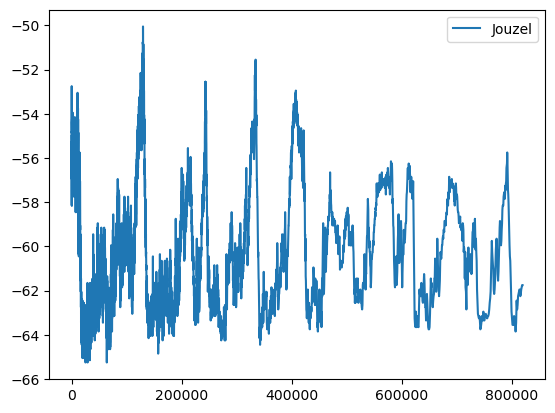

In [37]:
plt.plot(temp_jouzel['EDC3béta'],temp_jouzel['celsius'], label = 'Jouzel')
plt.legend()
plt.show()

In [38]:
temp_noaa=pd.read_csv('imported_datasets/Temp data NOAA.csv',skiprows=range(91),delimiter=r"\s+")
temp_noaa2=temp_noaa.dropna()

In [39]:
temp_noaa2

,Bag,ztop,Age,Deuterium,Temperature
12,13,6.60,38.37379,-390.90,0.88
13,14,7.15,46.81203,-385.10,1.84
14,15,7.70,55.05624,-377.80,3.04
15,16,8.25,64.41511,-394.10,0.35
16,17,8.80,73.15077,-398.70,-0.42
...,...,...,...,...,...
5795,5796,3187.25,797408.00000,-440.20,-8.73
5796,5797,3187.80,798443.00000,-439.00,-8.54
5797,5798,3188.35,799501.00000,-441.10,-8.88
5798,5799,3188.90,800589.00000,-441.42,-8.92


In [40]:
temp_noaa.describe()

,Bag,ztop,Age,Deuterium,Temperature
count,5800.000000,5800.000000,5800.000000,5788.000000,5785.000000
mean,2900.500000,1594.725000,190016.390617,-417.579610,-4.580228
std,1674.460112,920.953062,192546.207239,20.359332,3.446971
min,1.000000,0.000000,-50.000000,-449.500000,-10.580000
25%,1450.750000,797.362500,46330.569350,-432.500000,-7.450000
50%,2900.500000,1594.725000,121793.340000,-421.300000,-5.200000
75%,4350.250000,2392.087500,272456.740000,-403.200000,-1.820000
max,5800.000000,3189.450000,801662.000000,0.950000,5.460000


In [41]:
temp_noaa.dtypes

Bag              int64
ztop           float64
Age            float64
Deuterium      float64
Temperature    float64
dtype: object

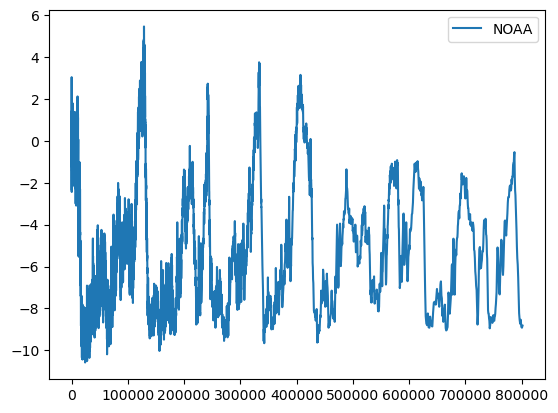

In [42]:
plt.plot(temp_noaa['Age'],temp_noaa['Temperature'], label = 'NOAA')
plt.legend()
plt.show()

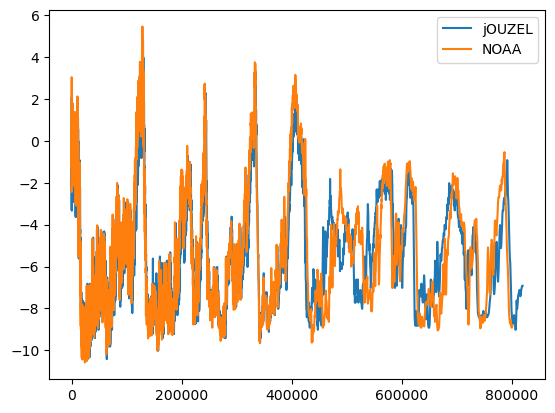

In [43]:
plt.plot(temp_jouzel['EDC3béta'],temp_jouzel['difference'], label = 'jOUZEL')
plt.plot(temp_noaa['Age'],temp_noaa['Temperature'], label = 'NOAA')
plt.legend()
plt.show()

# Read in Irish weather

I will read in irish rainfall datsets from . I will examine each dataset and plot the relebant variables to determine which dataset is most suitable for further analysis.

In [44]:
comp_irish_rainfall=pd.read_csv('imported_datasets/Composite Rainfall Ireland.csv')

In [45]:
comp_irish_rainfall

,Year,Month,Median montly series
0,1711,1,16.4
1,1711,2,73.1
2,1711,3,121.2
3,1711,4,85.2
4,1711,5,66.6
...,...,...,...
3667,2016,8,79.1
3668,2016,9,108.1
3669,2016,10,51.8
3670,2016,11,58.0


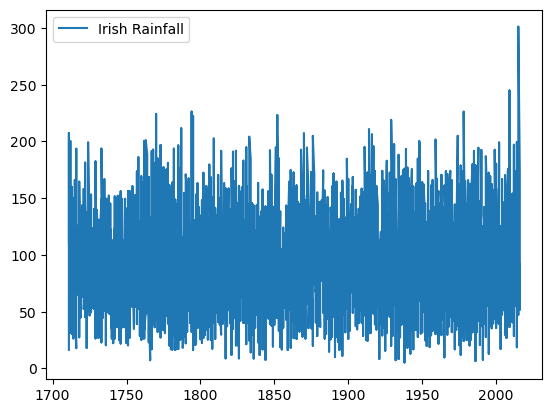

In [46]:
plt.plot(comp_irish_rainfall['Year'],comp_irish_rainfall['Median montly series'], label = 'Irish Rainfall')
plt.legend()
plt.show()

### above graph messy so going to get yearly average

In [47]:
mean_yearly_irish_rainfall=comp_irish_rainfall

In [48]:
print(mean_yearly_irish_rainfall.head())

   Year  Month  Median montly series
0  1711      1                  16.4
1  1711      2                  73.1
2  1711      3                 121.2
3  1711      4                  85.2
4  1711      5                  66.6


In [49]:
yearly_averages = mean_yearly_irish_rainfall.groupby('Year')['Median montly series'].mean()
print(yearly_averages)

Year
1711     90.966667
1712    104.383333
1713     81.875000
1714     73.683333
1715    104.833333
           ...    
2012     98.641667
2013     93.041667
2014    105.225000
2015    112.166667
2016     88.391667
Name: Median montly series, Length: 306, dtype: float64


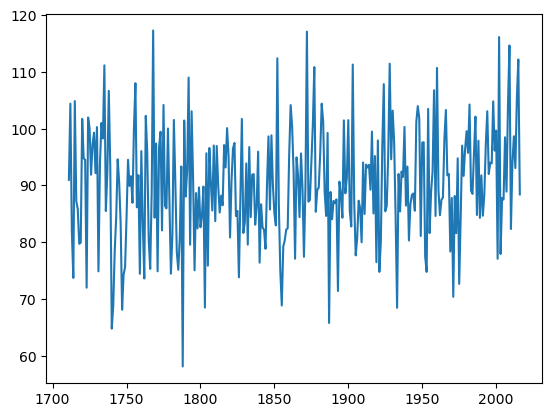

In [50]:
plt.plot(yearly_averages, label='Yearly Averages')

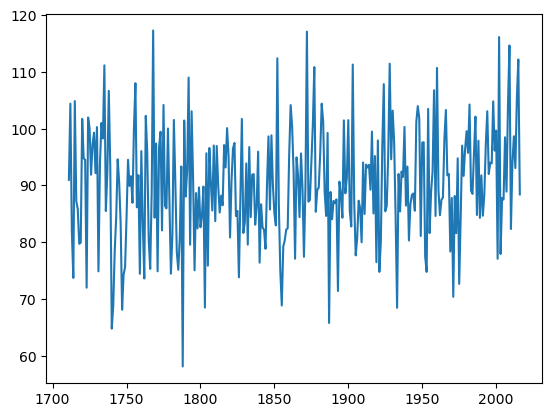

In [51]:
plt.plot(yearly_averages, label='Yearly Averages')

I will read in irish temp datsets from . I will examine each dataset and plot the relebant variables to determine which dataset is most suitable for further analysis.

In [52]:
irish_temp=pd.read_csv('imported_datasets/Ireland MeanTemperatures_1900-2022_annual.csv')

In [53]:
irish_temp

,year,Annual
0,2022,10.9
1,2021,10.5
2,2020,10.4
3,2019,10.5
4,2018,10.3
...,...,...
118,1904,9.1
119,1903,9.1
120,1902,9.2
121,1901,9.1


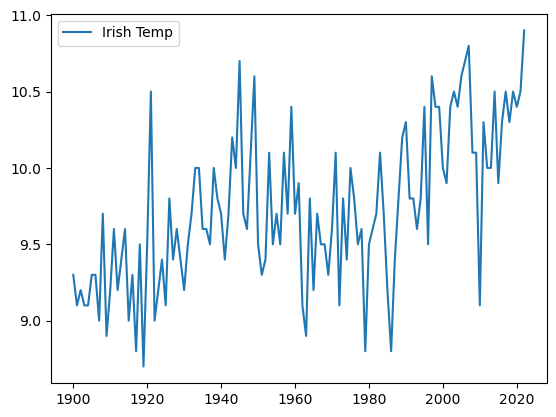

In [54]:
plt.plot(irish_temp['year'],irish_temp['Annual'], label = 'Irish Temp')
plt.legend()
plt.show()

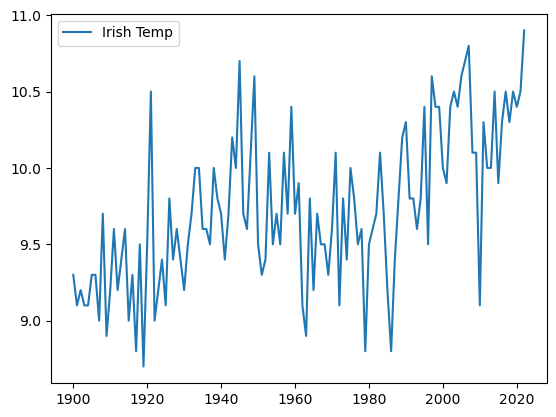

In [55]:
plt.plot(irish_temp['year'],irish_temp['Annual'], label = 'Irish Temp')
plt.legend()
plt.show()

# Methane
https://data.world/datasets/methane

I will read in irish rainfall datsets from . I will examine each dataset and plot the relebant variables to determine which dataset is most suitable for further analysis.

In [56]:
df17=pd.read_csv('Methane.csv',encoding='Latin')
df17

,EDC1999 depth,gas age (edc3_gas_a),CH4 mean,1 s uncertainty,"Bern, Grenoble"
0,99.34,13,907,10.0,b
1,102.45,126,784,10.0,g
2,102.58,130,762,10.0,b
3,103.34,151,710,10.0,g
4,104.33,184,727,10.0,g
...,...,...,...,...,...
2098,3188.08,794938,428,10.0,g
2099,3188.95,796320,418,10.0,b
2100,3189.43,797277,396,10.0,g
2101,3190.03,798417,458,10.0,g


In [57]:
#https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-ch4-2008.txt
methane_noaa=pd.read_csv('imported_datasets/Methane NOAA.csv',encoding='Latin',delimiter=r"\s+")

In [58]:
methane_noaa

,ï»¿Depth,Age,CH4_mean,1s,Lab.
0,99.34,13,907,10.0,b
1,102.45,126,784,10.0,g
2,102.58,130,762,10.0,b
3,103.34,151,710,10.0,g
4,104.33,184,727,10.0,g
...,...,...,...,...,...
2098,3188.08,794938,428,10.0,g
2099,3188.95,796320,418,10.0,b
2100,3189.43,797277,396,10.0,g
2101,3190.03,798417,458,10.0,g


In [59]:
methane_noaa.columns = methane_noaa.columns.str.lstrip()
methane_noaa.columns = methane_noaa.columns.str.rstrip()

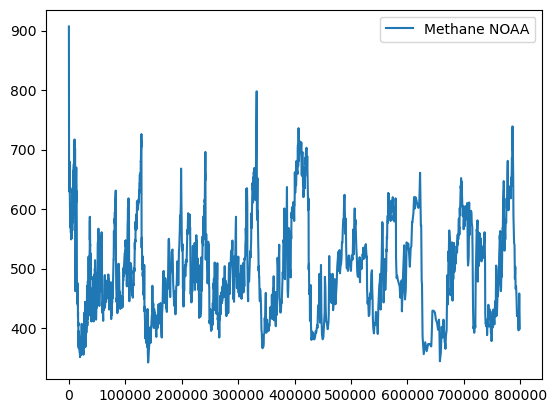

In [60]:
plt.plot(df17['gas age (edc3_gas_a)'],df17['CH4 mean'], label = 'Methane NOAA')
plt.legend()
plt.show()

In [61]:
methane_noaa.dtypes

ï»¿Depth    float64
Age           int64
CH4_mean      int64
1s          float64
Lab.         object
dtype: object

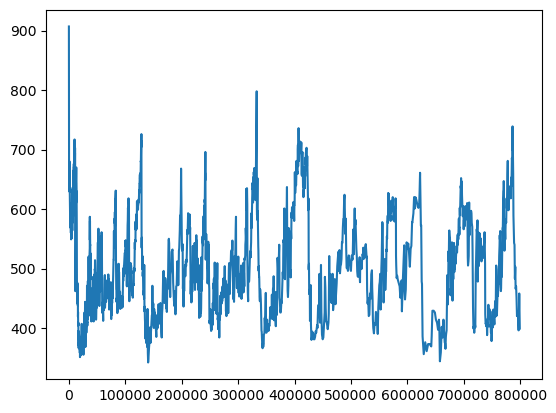

In [62]:
plt.plot(methane_noaa['Age'],methane_noaa['CH4_mean'], label = 'Methane')

In [63]:
#https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt

#https://stackoverflow.com/questions/19632075/how-to-read-file-with-space-separated-values-in-pandas
#df1=pd.read_csv('summary.csv',delimiter=r"\s+")
#df1 = pd.read_csv("deter.csv",sep = " ")
#df1.describe()
#print(df1['Bag'])


In [64]:
merged1 = pd.concat([df17])

In [65]:
merged1['blank1'] = 'SPACE'

In [66]:
merged2 = pd.concat([co2_nature,merged1,co2_ipcc,merged1,co2_mauna_loa,merged1,temp_noaa,merged1,temp_jouzel,merged1,comp_irish_rainfall,merged1,mean_yearly_irish_rainfall,merged1,irish_temp,merged1,methane_noaa],axis =1)

In [67]:
#https://researchdatapod.com/how-to-solve-python-typeerror-object-of-type-dataframe-is-not-json-serializable/
import json
json_str = merged2.to_csv()
with open('data.json', 'w') as f:
    json.dump(json_str, f)

In [68]:
merged2

,EDC3_gas_a (yr),CO2 (ppmv),EDC1999 depth,gas age (edc3_gas_a),CH4 mean,1 s uncertainty,"Bern, Grenoble",blank1,Gasage (yr BP),CO2 (ppmv),...,gas age (edc3_gas_a),CH4 mean,1 s uncertainty,"Bern, Grenoble",blank1,ï»¿Depth,Age,CH4_mean,1s,Lab.
0,137.0,280.4,99.34,13.0,907.0,10.0,b,SPACE,-51.030000,368.022488,...,13.0,907.0,10.0,b,SPACE,99.34,13.0,907.0,10.0,b
1,268.0,274.9,102.45,126.0,784.0,10.0,g,SPACE,-48.000000,361.780737,...,126.0,784.0,10.0,g,SPACE,102.45,126.0,784.0,10.0,g
2,279.0,277.9,102.58,130.0,762.0,10.0,b,SPACE,-46.279272,359.647793,...,130.0,762.0,10.0,b,SPACE,102.58,130.0,762.0,10.0,b
3,395.0,279.1,103.34,151.0,710.0,10.0,g,SPACE,-44.405642,357.106740,...,151.0,710.0,10.0,g,SPACE,103.34,151.0,710.0,10.0,g
4,404.0,281.9,104.33,184.0,727.0,10.0,g,SPACE,-43.080000,353.946685,...,184.0,727.0,10.0,g,SPACE,104.33,184.0,727.0,10.0,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5814,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
merged2=merged2.dropna()

In [70]:
ver = pd.read_csv('combined_temp.csv')
ver.head()

,EDC3_gas_a (yr),CO2 (ppmv),EDC1999 depth,gas age (edc3_gas_a),CH4 mean,1 s uncertainty,"Bern, Grenoble",blank1,Gasage (yr BP),CO2 (ppmv).1,...,gas age (edc3_gas_a).7,CH4 mean.7,1 s uncertainty.7,"Bern, Grenoble.7",blank1.7,ï»¿Depth,Age.1,CH4_mean,1s,Lab.
0,1153.0,277.7,112.14,459.0,670.0,10.0,g,SPACE,-36.616016,344.717769,...,459.0,670.0,10.0,g,SPACE,112.14,459.0,670.0,10.0,g
1,1233.0,278.7,113.03,478.0,644.0,10.0,b,SPACE,-36.143228,343.973677,...,478.0,644.0,10.0,b,SPACE,113.03,478.0,644.0,10.0,b
2,1350.0,277.4,114.67,533.0,670.0,10.0,g,SPACE,-35.762180,343.110752,...,533.0,670.0,10.0,g,SPACE,114.67,533.0,670.0,10.0,g
3,1453.0,279.2,114.78,539.0,668.0,10.0,g,SPACE,-34.916753,342.051976,...,539.0,668.0,10.0,g,SPACE,114.78,539.0,668.0,10.0,g
4,1552.0,280.0,115.22,554.0,680.0,10.0,g,SPACE,-33.076850,341.329297,...,554.0,680.0,10.0,g,SPACE,115.22,554.0,680.0,10.0,g


In [71]:
# #https://stackoverflow.com/questions/34926517/stop-sys-stdout-from-writing-to-a-text-file



https://stackoverflow.com/questions/16923281/writing-a-pandas-dataframe-to-csv-file

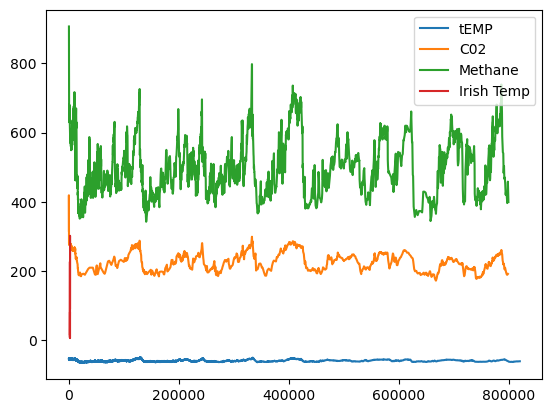

In [72]:
plt.plot(temp_jouzel['EDC3béta'],temp_jouzel['celsius'], label = 'tEMP')
plt.plot(co2_nature_mauna_loa['EDC3_gas_a (yr)'],co2_nature_mauna_loa['CO2 (ppmv)'], label = 'C02')
plt.plot(df17['gas age (edc3_gas_a)'],df17['CH4 mean'], label = 'Methane')
plt.plot(comp_irish_rainfall['Year'],comp_irish_rainfall['Median montly series'], label = 'Irish Temp')
plt.legend()
plt.show()

In [73]:
#https://stackoverflow.com/questions/16923281/writing-a-pandas-dataframe-to-csv-file
merged2.to_csv('combined_temp.csv', encoding='utf-8', index=False)

In [74]:
#json_str = merged1.to_csv()

https://stackoverflow.com/questions/39257147/convert-pandas-dataframe-to-json-format

In [75]:
#https://stackoverflow.com/questions/39257147/convert-pandas-dataframe-to-json-format
co2_nature_mauna_loa.to_json('combined_temps.json',orient='records')

In [76]:
from scipy.interpolate import interp1d
x = np.array(co2_nature["EDC3_gas_a (yr)"])
y = np.array(co2_nature["CO2 (ppmv)"])

In [77]:
x

array([   137,    268,    279, ..., 796467, 797099, 798512], dtype=int64)

In [78]:
y

array([280.4, 274.9, 277.9, ..., 189.3, 188.4, 191. ])

In [79]:
f = interp1d(x, y, kind="linear")

In [80]:
int_age = np.linspace(x[0], x[-1], 5785)

# Interpolate the values of y using the new array and the interpolation function
int_co2 = f(int_age)

In [81]:
int_age

array([1.37000000e+02, 2.75031639e+02, 4.13063278e+02, ...,
       7.98235937e+05, 7.98373968e+05, 7.98512000e+05])

In [82]:
int_co2

array([280.4       , 276.81771973, 281.43005225, ..., 190.49202794,
       190.74601397, 191.        ])

In [83]:
dfa = pd.DataFrame({'year': int_age, 'CO2': int_co2})


In [84]:
dfa.to_csv('interpolated.csv', encoding='utf-8')

In [85]:
dfi=pd.read_csv('interpolated.csv')
dfi

,Unnamed: 0,year,CO2
0,0,137.000000,280.400000
1,1,275.031639,276.817720
2,2,413.063278,281.430052
3,3,551.094917,280.736793
4,4,689.126556,281.761393
...,...,...,...
5780,5780,797959.873444,189.984056
5781,5781,798097.905083,190.238042
5782,5782,798235.936722,190.492028
5783,5783,798373.968361,190.746014


In [86]:
#co2_nature_mauna_loai = pd.concat(int_age,int_co2)

In [87]:
dfa.shape

(5785, 2)

In [88]:
dfa.shape

(5785, 2)

In [89]:
dfa.describe()

,year,CO2
count,5785.000000,5785.000000
mean,399324.500000,223.812813
std,230530.779174,25.423352
min,137.000000,171.693951
25%,199730.750000,202.972689
50%,399324.500000,222.284586
75%,598918.250000,241.652120
max,798512.000000,298.053853


MACHINELEARNINGMASTERY.COM
FREQUENCY ANALYSIS ??

In [90]:
#r = np.corrcoef(temp_jouzel.loc[:1095,'celsius'],df17.loc[:1095,'CH4 mean'])
#print("Correlation coefficient: between Wind Speed (Knot) & Synthesised Wind Speed (Knot) is ", r)
#r

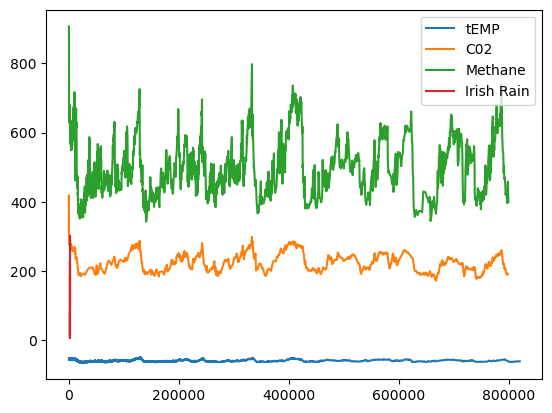

In [91]:
plt.plot(temp_jouzel['EDC3béta'],temp_jouzel['celsius'], label = 'tEMP')
plt.plot(co2_nature_mauna_loa['EDC3_gas_a (yr)'],co2_nature_mauna_loa['CO2 (ppmv)'], label = 'C02')
plt.plot(df17['gas age (edc3_gas_a)'],df17['CH4 mean'], label = 'Methane')
plt.plot(comp_irish_rainfall['Year'],comp_irish_rainfall['Median montly series'], label = 'Irish Rain')
plt.legend()
plt.show()

# Fourier transform 

In [92]:
from scipy.fft import fft, fftfreq
import pandas as pd
import scipy.fft
# Read the dataset from a CSV file
#df = pd.read_excel('C02 Nature Paper.xlsx',sheet_name='3.  Composite CO2' ,skiprows=range(6))

# Select the column with CO2 (ppmv) values
y = co2_nature['CO2 (ppmv)']
y = np.ascontiguousarray(y)


In [93]:
yf = fft(y) # Frequency spectrum
xf = fftfreq(y.size)

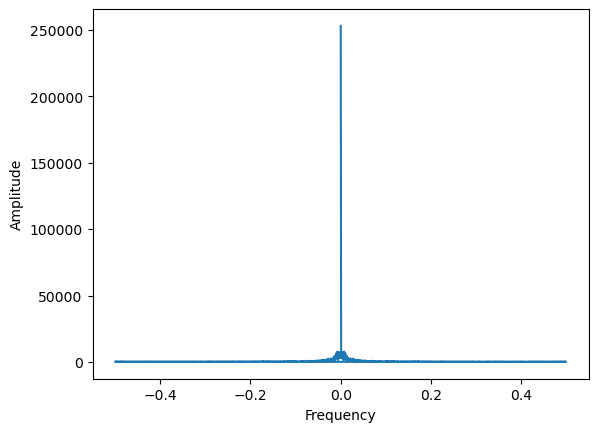

In [94]:
plt.plot(xf, np.abs(yf)) # Plot the magnitude of the spectrum
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

In [95]:
co2_nature

,EDC3_gas_a (yr),CO2 (ppmv)
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9
...,...,...
1091,794608,199.4
1092,795202,195.2
1093,796467,189.3
1094,797099,188.4


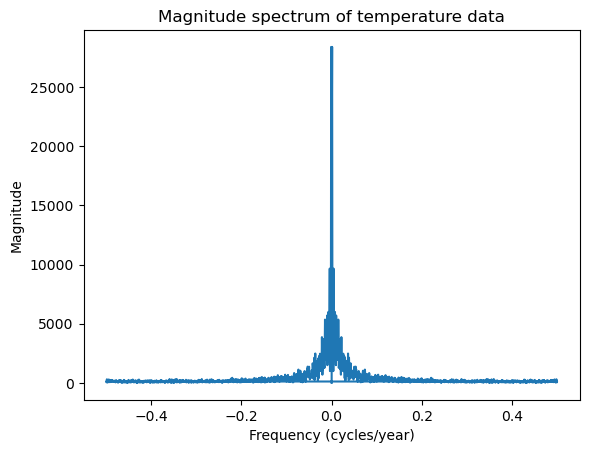

In [96]:
#df = pd.read_csv("global_temperature.csv")

# Extract the temperature column as a numpy array
temp = co2_ipcc["CO2 (ppmv)"].to_numpy()

# Subtract the mean to concentrate on temperature fluctuations
temp = temp - np.mean(temp)

# Perform the Fourier transform
Temp = np.fft.fft(temp) # complex spectrum
Temp_mag = np.abs(Temp) # magnitude spectrum
Temp_phase = np.angle(Temp) # phase spectrum
f = np.fft.fftfreq(len(temp), 1) # frequency vector in cycles per year

# Plot the magnitude spectrum in frequency domain
plt.figure()
plt.plot(f, Temp_mag)
plt.xlabel("Frequency (cycles/year)")
plt.ylabel("Magnitude")
plt.title("Magnitude spectrum of temperature data")
#plt.xlim(0, -.5) # zoom in to see the peaks
plt.show()

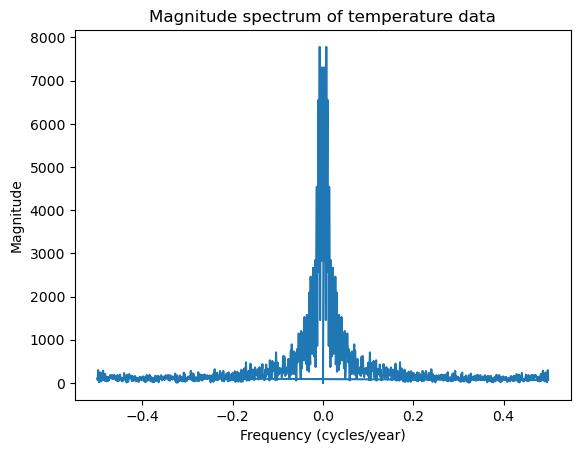

In [97]:
#df = pd.read_csv("global_temperature.csv")

# Extract the temperature column as a numpy array
temp = co2_nature["CO2 (ppmv)"].to_numpy()

# Subtract the mean to concentrate on temperature fluctuations
temp = temp - np.mean(temp)

# Perform the Fourier transform
Temp = np.fft.fft(temp) # complex spectrum
Temp_mag = np.abs(Temp) # magnitude spectrum
Temp_phase = np.angle(Temp) # phase spectrum
f = np.fft.fftfreq(len(temp), 1) # frequency vector in cycles per year

# Plot the magnitude spectrum in frequency domain
plt.figure()
plt.plot(f, Temp_mag)
plt.xlabel("Frequency (cycles/year)")
plt.ylabel("Magnitude")
plt.title("Magnitude spectrum of temperature data")
#plt.xlim(0, -.5) # zoom in to see the peaks
plt.show()

from sklearn.linear_model import LinearRegression
# Create a linear regression model to predict global temperature based on CO2 levels
X = co2_nature_mauna_loa['CO2 (ppmv)'].values.reshape(-1, 1)
y = temp_noaa2['Temperature'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)

# Print the model coefficients
#print(f'Intercept: {model.intercept_[0]:.2f}')
#print(f'Slope: {model.coef_[0][0]:.2f}')

https://stackoverflow.com/questions/41492882/find-time-shift-of-two-signals-using-cross-correlation

In [98]:
ts1=co2_nature_mauna_loa['CO2 (ppmv)']
ts2=temp_noaa2['Temperature']
ts3=methane_noaa['CH4_mean']
ts4=yearly_averages
ts6=irish_temp['Annual']

In [99]:

from scipy import signal
corr = signal.correlate(ts1,ts2,mode='same')

n = len(corr)
lags = np.linspace(-n/2, n/2, n)

# Find the lag that corresponds to the maximum cross-correlation
max_lag = lags[np.argmax(corr)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


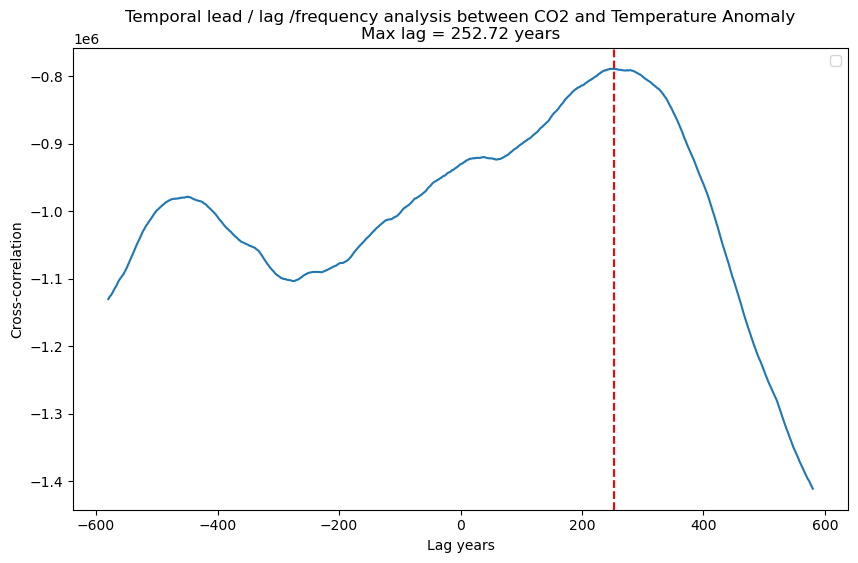

In [100]:
plt.figure(figsize=(10, 6))
plt.plot(lags, corr)
plt.axvline(max_lag, color='red', linestyle='--')
plt.xlabel('Lag years')
plt.ylabel('Cross-correlation')
plt.title(f'Temporal lead / lag /frequency analysis between CO2 and Temperature Anomaly\nMax lag = {max_lag:.2f} years')
plt.legend()
plt.show()

In [101]:
corr = signal.correlate(ts2,ts3,mode='same')

n = len(corr)
lags = np.linspace(-n/2, n/2, n)

# Find the lag that corresponds to the maximum cross-correlation
max_lag = lags[np.argmax(corr)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


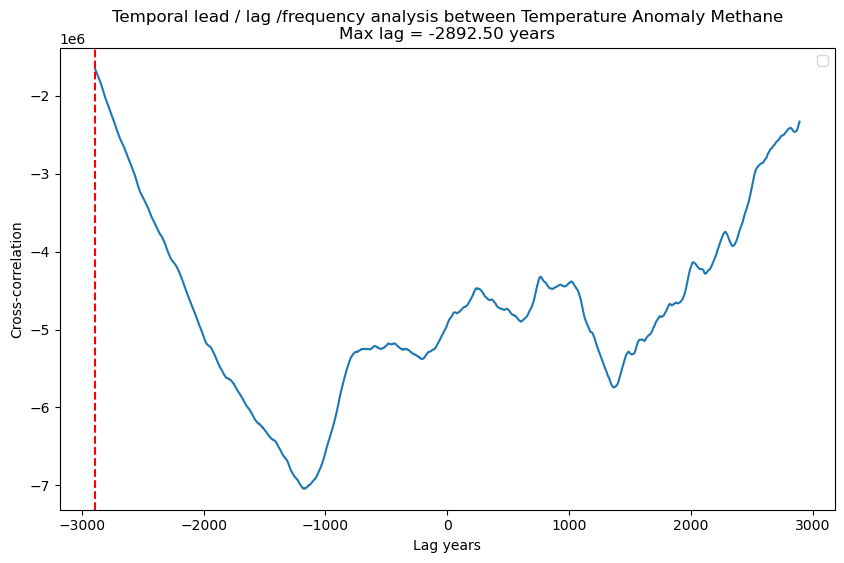

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(lags, corr)
plt.axvline(max_lag, color='red', linestyle='--')
plt.xlabel('Lag years')
plt.ylabel('Cross-correlation')
plt.title(f'Temporal lead / lag /frequency analysis between Temperature Anomaly Methane\nMax lag = {max_lag:.2f} years')
plt.legend()
plt.show()

In [103]:
corr = signal.correlate(ts1,ts4,mode='same')

n = len(corr)
lags = np.linspace(-n/2, n/2, n)

# Find the lag that corresponds to the maximum cross-correlation
max_lag = lags[np.argmax(corr)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


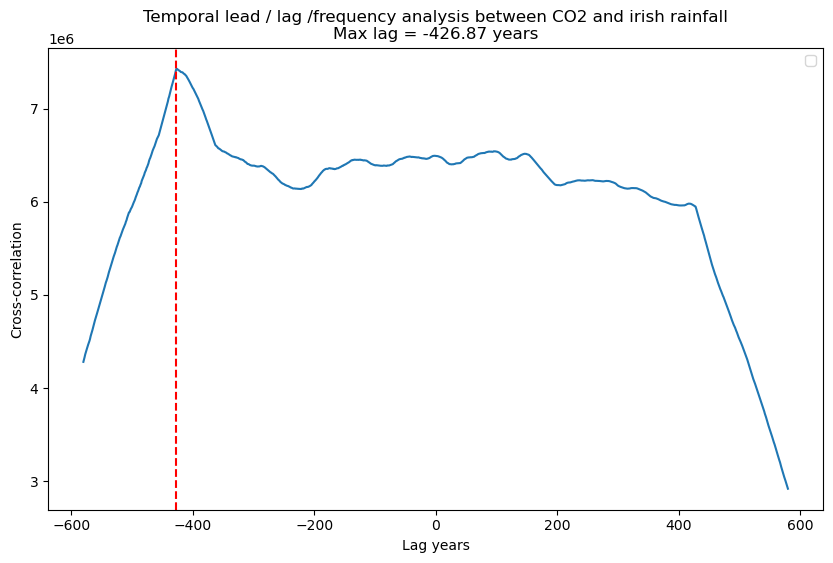

In [104]:
plt.figure(figsize=(10, 6))
plt.plot(lags, corr)
plt.axvline(max_lag, color='red', linestyle='--')
plt.xlabel('Lag years')
plt.ylabel('Cross-correlation')
plt.title(f'Temporal lead / lag /frequency analysis between CO2 and irish rainfall\nMax lag = {max_lag:.2f} years')
plt.legend()
plt.show()

In [105]:
corr = signal.correlate(ts1,ts6,mode='same')

n = len(corr)
lags = np.linspace(-n/2, n/2, n)

# Find the lag that corresponds to the maximum cross-correlation
max_lag = lags[np.argmax(corr)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


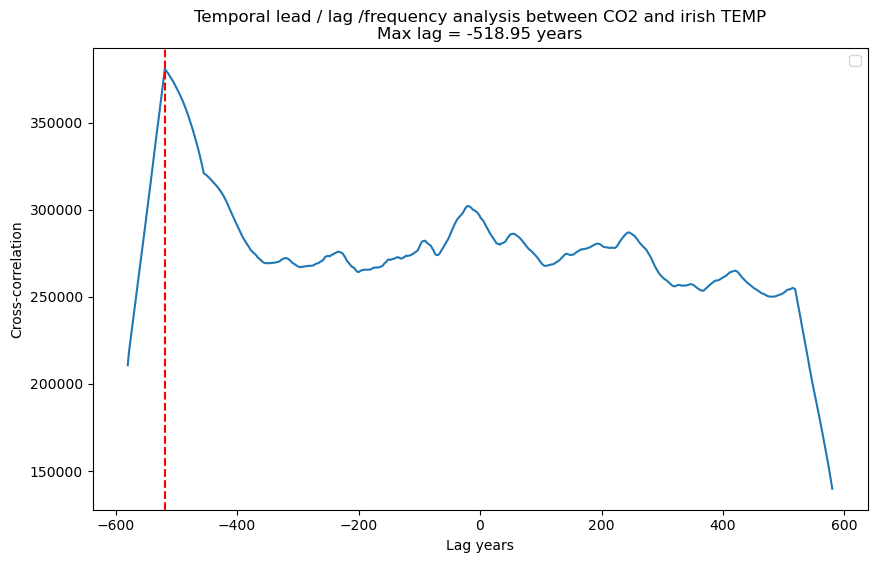

In [106]:
plt.figure(figsize=(10, 6))
plt.plot(lags, corr)
plt.axvline(max_lag, color='red', linestyle='--')
plt.xlabel('Lag years')
plt.ylabel('Cross-correlation')
plt.title(f'Temporal lead / lag /frequency analysis between CO2 and irish TEMP\nMax lag = {max_lag:.2f} years')
plt.legend()
plt.show()

# Frequency Analysis

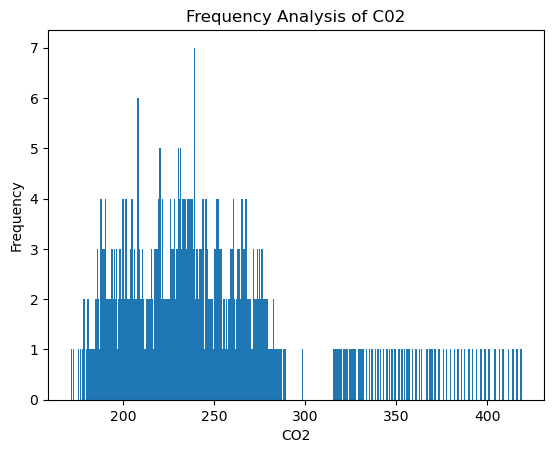

In [107]:
freq = ts1.value_counts()

#plot the frequencies as a bar chart
plt.bar(freq.index, freq.values)
plt.xlabel("CO2")
plt.ylabel("Frequency")
plt.title("Frequency Analysis of C02")
plt.show()

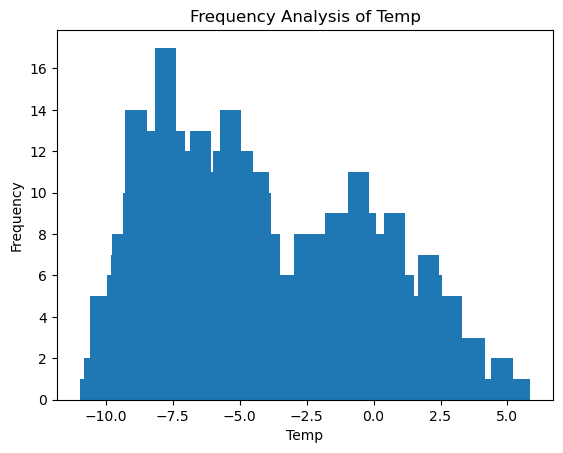

In [108]:
freq = ts2.value_counts()

#plot the frequencies as a bar chart
plt.bar(freq.index, freq.values)
plt.xlabel("Temp")
plt.ylabel("Frequency")
plt.title("Frequency Analysis of Temp")
plt.show()

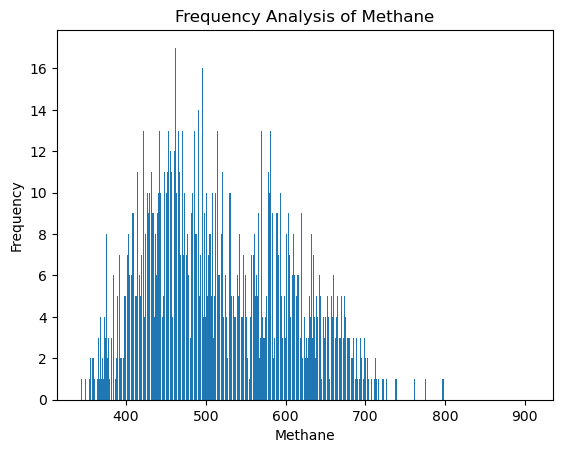

In [109]:
freq = ts3.value_counts()

#plot the frequencies as a bar chart
plt.bar(freq.index, freq.values)
plt.xlabel("Methane")
plt.ylabel("Frequency")
plt.title("Frequency Analysis of Methane")
plt.show()

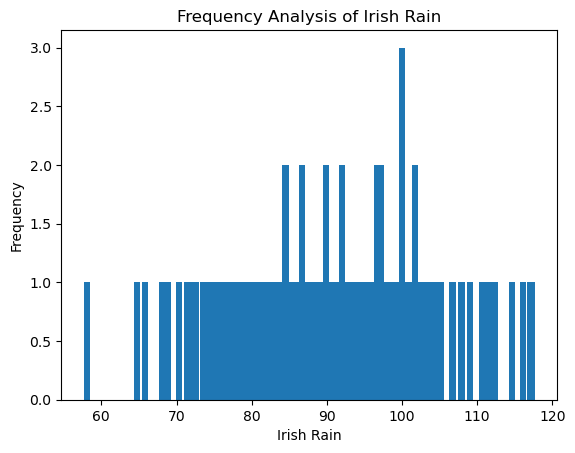

In [110]:
freq = ts4.value_counts()

#plot the frequencies as a bar chart
plt.bar(freq.index, freq.values)
plt.xlabel("Irish Rain")
plt.ylabel("Frequency")
plt.title("Frequency Analysis of Irish Rain")
plt.show()

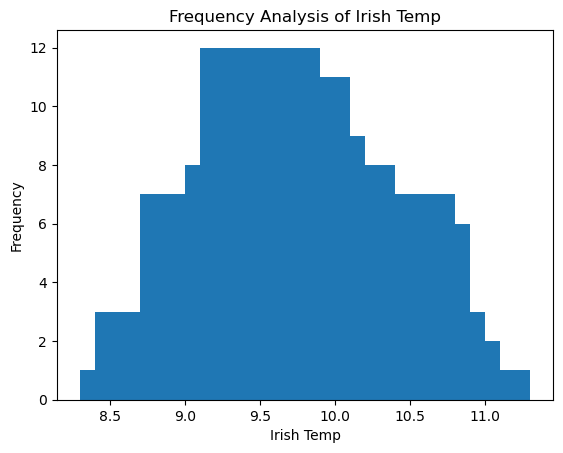

In [111]:
freq = ts6.value_counts()

#plot the frequencies as a bar chart
plt.bar(freq.index, freq.values)
plt.xlabel("Irish Temp")
plt.ylabel("Frequency")
plt.title("Frequency Analysis of Irish Temp")
plt.show()

In [112]:
co2_mauna_loa.head()

,EDC3_gas_a (yr),CO2 (ppmv),unc
0,-9,315.98,0.12
1,-10,316.91,0.12
2,-11,317.64,0.12
3,-12,318.45,0.12
4,-13,318.99,0.12


In [113]:
ts11=temp_noaa2

In [114]:
ts11

,Bag,ztop,Age,Deuterium,Temperature
12,13,6.60,38.37379,-390.90,0.88
13,14,7.15,46.81203,-385.10,1.84
14,15,7.70,55.05624,-377.80,3.04
15,16,8.25,64.41511,-394.10,0.35
16,17,8.80,73.15077,-398.70,-0.42
...,...,...,...,...,...
5795,5796,3187.25,797408.00000,-440.20,-8.73
5796,5797,3187.80,798443.00000,-439.00,-8.54
5797,5798,3188.35,799501.00000,-441.10,-8.88
5798,5799,3188.90,800589.00000,-441.42,-8.92


In [115]:
#ts_co2_mauna_loa=co2_mauna_loa = ts_co2_mauna_loa=co2_mauna_loa.to_period()
#https://www.kaggle.com/code/ryanholbrook/linear-regression-with-time-series/tutorial
ts111 =pd.read_csv('reducedjouzel.csv',encoding='Latin')

In [116]:
df = ts111.copy()

df['tme'] = np.arange(len(ts111.index))

df.tail()

,bag,ztop,EDC3bÃ©ta,AICC2012,deutfinal,temp,acc-EDC3beta,difference,celsius,datetime,datetimes,tme
16,17,8.80,73.05573,66.380000,-398.7,217.0,3.011312,-1.32,-56.15,-1876.94427,00:00.0,16
17,18,9.35,81.72349,75.710000,-395.9,217.4,2.994881,-0.92,-55.75,-1868.27651,00:00.0,17
18,19,9.90,90.43857,85.040000,-395.9,217.4,2.924870,-0.92,-55.75,-1859.56143,00:00.0,18
19,20,10.45,99.70485,94.863333,-399.3,216.9,2.678806,-1.42,-56.25,-1850.29515,00:00.0,19
20,21,11.00,109.81950,104.686667,-391.4,218.2,2.668117,-0.12,-54.95,-1840.18050,00:00.0,20


In [117]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression

# Training data
X111 = df.loc[:, ['tme']]  # features
y111 = df.loc[:, 'difference']  # target

# Train the model
model = LinearRegression()
model.fit(X111, y111)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred111 = pd.Series(model.predict(X111), index=X111.index)


Text(0.5, 1.0, 'Prediction of Temperature Anomoly')

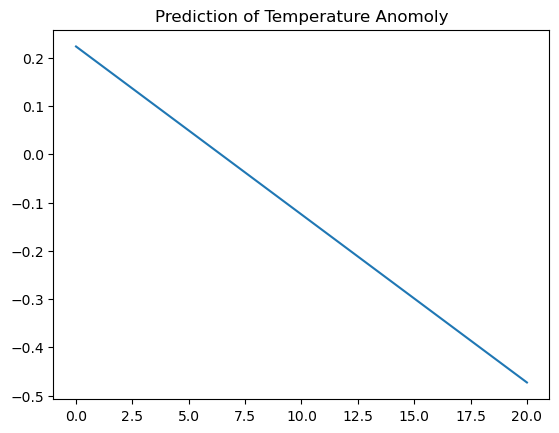

In [118]:
#ax = y111.plot(linewidth=1)  
ax = y_pred111.plot()
ax.set_title('Prediction of Temperature Anomoly')

In [119]:
future_years = pd.date_range(start='2020', end='2041', freq='Y') # Create a date range of future years


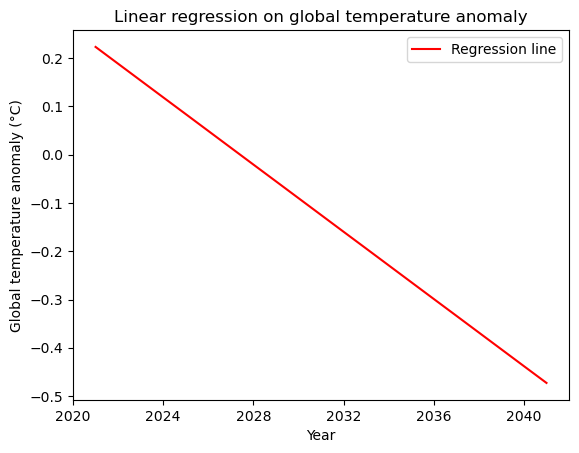

In [120]:
plt.plot(future_years, y_pred111, color='red', label='Regression line')
#plt.scatter(data['Year'], data['temp_anomaly'], label='Observed data')
plt.xlabel('Year')
plt.ylabel('Global temperature anomaly (°C)')
plt.title('Linear regression on global temperature anomaly')
plt.legend()
plt.show()


In [121]:
ts112 =pd.read_csv('ta.csv',encoding='Latin')

In [122]:
df112 = ts112.copy()

df112['tme'] = np.arange(len(ts112.index))


In [123]:
df112.columns = df112.columns.str.lstrip()
df112.columns = df112.columns.str.rstrip()

In [124]:
df112

,ï»¿year,anomaly,tme
0,1985,0.497300,0
1,1986,0.095687,1
2,1987,0.243026,2
3,1988,0.282152,3
4,1989,0.179250,4
5,1990,0.360562,5
6,1991,0.338897,6
7,1992,0.124897,7
8,1993,0.165658,8
9,1994,0.233550,9


In [125]:
#df112 = df112.rename(columns={'Global average temperature anomaly relative to 1961-1990': 'temp_anomaly'}) # Rename column for clarity

In [126]:
df112['ï»¿year'] = pd.to_datetime(df112['ï»¿year'], format='%Y')

In [127]:
X112 = df112.loc[:, ['tme']]  # features
y112 = df112.loc[:, 'anomaly']  # target

In [128]:
df112

,ï»¿year,anomaly,tme
0,1985-01-01,0.497300,0
1,1986-01-01,0.095687,1
2,1987-01-01,0.243026,2
3,1988-01-01,0.282152,3
4,1989-01-01,0.179250,4
5,1990-01-01,0.360562,5
6,1991-01-01,0.338897,6
7,1992-01-01,0.124897,7
8,1993-01-01,0.165658,8
9,1994-01-01,0.233550,9


In [129]:
future_yearss = pd.date_range(start='2020', end='2059', freq='Y') # Create a date range of future years

In [130]:
model.fit(X112, y112) # Train the model
y_pred11 = model.predict(X112) # Make predictions


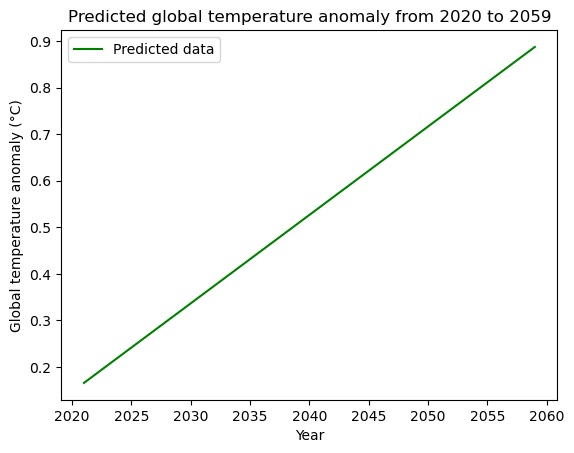

In [131]:
plt.plot( future_yearss,y_pred11, color='green', label='Predicted data')
plt.xlabel('Year')
plt.ylabel('Global temperature anomaly (°C)')
plt.title('Predicted global temperature anomaly from 2020 to 2059')
plt.legend()
plt.show()

# Fit a linear regression model to the data
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = data['Year'].dt.year.values.reshape(-1, 1) # Reshape year column to 2D array
y = data['temp_anomaly'].values # Extract temp_anomaly column as 1D array
model.fit(X, y) # Train the model
y_pred = model.predict(X) # Make predictions
#print(f'Linear regression equation: y = {model.coef_[0]:.4f} * x + {model.intercept_:.4f}')
#print(f'R-squared score: {model.score(X, y):.4f}')

# Plot the regression line
plt.plot(data['Year'], y_pred, color='red', label='Regression line')
plt.scatter(data['Year'], data['temp_anomaly'], label='Observed data')
plt.xlabel('Year')
plt.ylabel('Global temperature anomaly (°C)')
plt.title('Linear regression on global temperature anomaly')
plt.legend()
plt.show()




future_years1 = pd.date_range(start='2020', end='2070', freq='Y') # Create a date range of future years
future_X1 = future_years.year.values.reshape(-1, 1) # Reshape to 2D array
future_y_pred1 = model.predict(future_X1) # Make predictions
future_y_pred1

plt.plot(future_y_pred1, color='green', label='Predicted data')
plt.xlabel('Year')
plt.ylabel('Global temperature anomaly (°C)')
plt.title('Predicted global temperature anomaly from 2020 to 2070')
plt.legend()
plt.show()

In [132]:
#dfs = dfs.rename(columns={'Global average temperature anomaly relative to 1961-1990': 'temp_anomaly'}) # Rename column for clarit

In [133]:
temp_noaas=pd.read_csv('imported_datasets/Temp data NOAA.csv',skiprows=range(91),nrows=21,delimiter=r"\s+")
temp_noaa2s=temp_noaa.dropna()

In [134]:
temp_noaa2s

,Bag,ztop,Age,Deuterium,Temperature
12,13,6.60,38.37379,-390.90,0.88
13,14,7.15,46.81203,-385.10,1.84
14,15,7.70,55.05624,-377.80,3.04
15,16,8.25,64.41511,-394.10,0.35
16,17,8.80,73.15077,-398.70,-0.42
...,...,...,...,...,...
5795,5796,3187.25,797408.00000,-440.20,-8.73
5796,5797,3187.80,798443.00000,-439.00,-8.54
5797,5798,3188.35,799501.00000,-441.10,-8.88
5798,5799,3188.90,800589.00000,-441.42,-8.92


In [135]:
sdf = temp_noaa2s.copy()
sdf['tme'] = np.arange(len(temp_noaa2s.index))
sdf

,Bag,ztop,Age,Deuterium,Temperature,tme
12,13,6.60,38.37379,-390.90,0.88,0
13,14,7.15,46.81203,-385.10,1.84,1
14,15,7.70,55.05624,-377.80,3.04,2
15,16,8.25,64.41511,-394.10,0.35,3
16,17,8.80,73.15077,-398.70,-0.42,4
...,...,...,...,...,...,...
5795,5796,3187.25,797408.00000,-440.20,-8.73,5780
5796,5797,3187.80,798443.00000,-439.00,-8.54,5781
5797,5798,3188.35,799501.00000,-441.10,-8.88,5782
5798,5799,3188.90,800589.00000,-441.42,-8.92,5783


In [136]:
sx = sdf.loc[:, ['tme']]  # features
sy = sdf.loc[:, 'Temperature']  # target

# Train the model
model = LinearRegression()
model.fit(sx, sy)

# Store the fitted values as a time series with the same time index as
# the training data
sy_pred111 = pd.Series(model.predict(sx), index=sx.index)

Text(0.5, 1.0, 'Prediction of Temperature Anomoly')

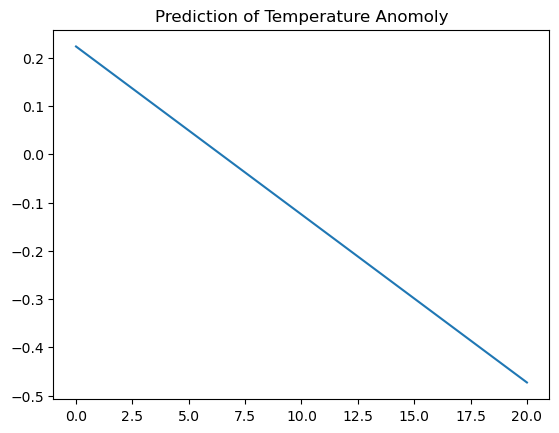

In [137]:
ax = y_pred111.plot()
ax.set_title('Prediction of Temperature Anomoly')